### **Financial Mathematics: Final Project**

2022121114 변종욱

**Outline**

In this project, I study the consumption-based CAPM model developed by Robert Lucas (also known as the **"Lucas tree model"** of asset pricing). The outline is as follows:

1. I first introduce the theoretical model and its solution concept.

1. Based on dynamic programming techniques, I then implement a quantitative method to solve Lucas type models. 

1. Finally, I test the performance of this model by calibrating it to match momemts from real-world data.

**Motivation**

In class, we have studied financial models that describe the movements of asset prices, which are based on mathematical observations of the behavior of the market. 

An alternative approach is to derive a model starting from the economic decisions of market participants, which in economics we call "micro-founded" models. It would be a valuable exercise to compare these models to financial mathematics type models.

### 1. Introduction to Consumption-Based CAPM

#### 1.1 The Lucas Tree Model of Asset Pricing

Below I present a simplified version of the asset pricing model introduced in the seminal paper *Asset Prices in an Exchange Economy (Econometrica, 1978)* by Robert E. Lucas.

In a pure exchange economy (i.e. all endowments are exogenous, as opposed to production economies), there is a single "productive unit" that costlessly generates a sequence of consumption goods $ \{y_t\}_{t=0}^{\infty} $.

For example,
- productive unit: apple tree (hence the name Lucas "tree")
- consumption goods: apple

We assume that $y_t$ follows a **first-order Markov process**
$$
F(y', y) = \Pr[y_{t+1} \le y' | y_t = y]
$$

An asset is a claim on all or part of this endowment stream via ownership of a share of the productive unit. i.e., we generalize the productive unit to a divisible **asset** and consumption goods to its **dividends**.

**Consumer's Problem**

The representative consumer ranks consumption streams $ \{c_t\}_{t=0}^{\infty} $ according to the time separable utility functional

<a id='obj'></a>
$$
\mathbb{E} \sum_{t=0}^\infty \beta^t u(c_t) \tag{1}
$$

where

- $ \beta \in (0,1) $ is a fixed discount factor.  
- $ u $ is a strictly increasing, strictly concave, continuously differentiable period utility function.  
- $ \mathbb{E} $ is expectation.

**Pricing a Lucas Tree**

By solving the consumer's problem, we intend to find the function $p(\cdot)$ that maps $y_t$ to the asset price $p_t$.

The timing of the model is that
- at time $t$, the consumer decides the share $ x_t $ of the claim of the tree sold at price $p_t$ and the amount of consumption good $c_t$, whose price is normalized as $1$.
- at time $t+1$, the consumer has an inherited share $z_{t+1}$ from period $t$. i.e., $z_{t+1} = x_t$ and gets the dividend $y_{t+1} z_{t+1}$.
- the consumer is eligible to sell his share $z_{t+1}$ at price $p_{t+1}$.

Hence, the **budget constraint** for each period is
$$ c_t + p_t x_t = y_t z_t + p_t z_t $$
along with $ c_t \geq 0 $ and $ 0 \leq z_t \leq 1 $ at each $ t $.

Subject to this budget constraint, the consumer finds **the optimal stream of control variables** $ \{c_t, x_t\}_{t=0}^{\infty} $ that maximizes [(1)](#obj)

#### 1.2 The Dynamic Programming Problem

**The Bellman Equation**

We can write the consumer's problem as a dynamic programming problem, exploiting its recursive nature.

First, a few remarks:
- Since this is a competitive model, the consumer will take this function $ p (\cdot) $ as given. i.e. we assume no market power.  
- In this way, we determine consumer behavior given $ p $ and then use equilibrium conditions (optimality and market clearing) to recover $ p $.

Using the assumption that price is a given function $ p $ of $ y $, we write the value function as

$$
v(z, y) = \max_{c, x}
    \left\{
        u(c) + \beta \int v(x, y') \phi(dy' | y)
    \right\}
$$

subject to the budget constraint


<a id='equation-preltbe'></a>
$$
c + p(y)x \leq yz + p(y)z \tag{2}
$$

**Key Optimality Conditon**

Since utility $u$ is an increasing function in $c$, we know $ c(z, y) = z (y + p(y)) - x(z,y)p(y)$ at the optimum. So write

<a id='equation-ltbe'></a>
$$
v(z, y) = \max_{x}
    \left\{
        u[(y + p(y))z - p(y)x ] + \beta \int v(x, y') \phi(dy' | y)
    \right\} \tag{3}
$$

Then the FOC for [(3)](#equation-ltbe) can be written as

$$
u'(c)  p(y) = \beta \int v_1'(x, y') \phi(dy' | y)
$$

By the envelope theorem,

$$
v'_1(z, y) = u'(c) (y + p(y))
$$

Also, since this is a representative agent model, where there is no trade at the equilibrium, the market clearing condtion is $ z_t = 1, ^\forall t$. Hence, $$c_t = y_t$$ holds for all $t$. 

Combining the conditions above, we get

<a id='equation-lteeq'></a>
$$
p(y)  = \beta \int \frac{u'(y')}{u'(y)} [y' + p(y')]  \phi(dy'|y) \tag{4}
$$

which can also be written as

<a id='equation-lteeqs'></a>
$$
p_t = \mathbb{E}_t \left[ \beta \frac{u'(c_{t+1})}{u'(c_t)} ( y_{t+1} + p_{t+1} ) \right] \tag{5}
$$

Equation [(5)](#equation-lteeqs) is the celebrated consumption-based capital asset pricing equation.

### 2. Quantitative Solution of the Model

#### 2.1 More on Dynamic Programming

We rewrite equation [(4)](#equation-lteeq) as

$$
u'(y)p(y)  = \beta \int {u'(y')}y'\phi(dy'|y) + \beta \int {u'(y')} p(y') \phi(dy'|y)
$$

Let
<a id='equation-ltffp'></a>
$$
f(y) := u'(y) p(y) \tag{6}
$$

Then equation [(4)](#equation-lteeq) becomes
<a id='equation-lteeq2'></a>
$$
f(y) = g(y) + \beta \int f(y') \phi(dy'|y) \tag{7}
$$

where $g(y) := \beta \int {u'(y')}y'\phi(dy'|y) $ is a function depending only on $\phi(\cdot)$, given as part of the Markov chain.

Define the operator $T: C_B(\mathbb{R}) \rightarrow C_B(\mathbb{R})$ as a mapping from a continuous bounded function $ f $ to another such function $ Tf $ by

<a id='equation-lteeqt'></a>
$$
(Tf)(y) = g(y) + \beta \int f(y') \phi(dy'|y) \tag{8}
$$

Then,

$$
\begin{aligned}
    |T\psi(y) - T\varphi(y)|
    & = \left| \beta \int \psi(y') \phi(dy'|y) - \beta \int \varphi(y') \phi(dy'|y) \right|
    \\
    & \leq \beta \int \left| \psi(y') - \varphi(y') \right| \phi(dy'|y)
    \\
    & \leq \beta \int \| \psi -  \varphi \| \phi(dy'|y)
    \\
    & = \beta  \| \psi -  \varphi \|
\end{aligned}
$$

Since $\beta < 1$, $T$ is a contraction. 

Thus, we can apply the ***contraction mapping theorem*** *(CMT; Banach fixed-point theorem)* to see that $$T: C_B(\mathbb{R}) \rightarrow C_B(\mathbb{R})$$ has a unique fixed point $f^* \in C_B(\mathbb{R})$

The *CMT* also states that for any $f \in C_B(\mathbb{R})$, $$T^k f \rightarrow f^* \quad \text{(uniformly)}$$

Hence we can implement the following **quantitative solution method**: 
1. define some initial function $f_0$ on a grid $G$
1. iteratively apply the operator $T$ to get $f_{k+1} = Tf_k$ until $\max_{a \in G} \left| f_{k+1}(a) - f_k(a)\right| < \varepsilon$ for $\varepsilon$ small.
1. take the final $f_{K+1}$ as the limit of the sequence, i.e., $f^*$

Note that the fixed point $f^*$ is indeed a function that solves equation [(7)](#equation-lteeq2).

Combining with [(6)](equation-ltffp), we can find the **pricing function** 
$$p^*(y) = \frac{f^*(y)}{u'(y)}$$

#### 2.2 Implementation

**Model Assumptions**

For implementation of the solution method, we make some additional assumptions.
1. $ \{y_t\}_{t=0}^{\infty} $ follows an AR(1) process $ 
\ln y_{t+1} = \rho \ln y_t + \epsilon_{t+1}, \quad \epsilon_{t+1} \sim N(0, \sigma^2) \quad \text{i.i.d.} $
1. Utility takes the isoelastic form $ u(c) = \frac{c^{1-\gamma}}{1-\gamma} $, where $ \gamma > 0 $ is the relative risk aversion parameter.

**Class Construction**

In [1]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)
import quantecon as qe

In [2]:
class LucasTree:
    def __init__(self, γ=2, β=0.95, ρ=0.9, σ=0.1, n=9):
        self.γ, self.β, self.ρ, self.σ, self.n = γ, β, ρ, σ, n

        # discretize y into 9 states using Tauchen's Method
        mc = qe.markov.approximation.tauchen(n, rho = ρ, sigma = σ)
        self.mc = mc
        self.P =  mc.P
        self.φ, self.lny = mc.stationary_distributions, mc.state_values

        # normalize so that E[y] = 1
        ygrid = np.exp(self.lny)
        μ = self.φ @ ygrid
        self.ygrid = ygrid / μ

        self.price = None

        self.g = np.empty(n)
        for i, y in enumerate(self.ygrid):
            exp = 0
            for j in range(len(self.ygrid)):
                exp += self.ygrid[j] ** (1-γ) * self.P[i,j]
            self.g[i] = β * exp

    # define the functional operator T
    def T(self, f):
        ygrid, g = self.ygrid, self.g
        β, P = self.β, self.P
    
        Tf = np.empty_like(f)
        for i in range(len(ygrid)):
            exp = 0
            for j in range(len(ygrid)):
                exp += f[j] * P[i,j]
            Tf[i] = g[i] + β * exp
            
        return Tf

    # find the fixed point of T and the eqbm price 
    def solve_model(self, tol=1e-6, max_iter=1000, verbose=False, print_skip=25):

        ygrid, γ = self.ygrid, self.γ
    
        i = 0
        f = np.ones_like(ygrid)  # Initial guess of f
        error = tol + 1
        while error > tol and i < max_iter:
            Tf = self.T(f)
            error = np.max(np.abs(Tf - f))
            f = Tf
            i += 1
    
            if verbose and i % print_skip == 0:
                print(f"Error at iteration {i} is {error}.")
    
        if i == max_iter:
            print("Failed to converge!")
    
        if verbose and i < max_iter:
            print(f"\nConverged in {i} iterations.") # fixed point found
    
        price = f * ygrid**γ # eqbm price
        self.price = price
        
        return price

    # Markov Chain simulation
    def simulate(self, T=1000):

        if self.price is None:
            self.solve_model()

        idx = self.mc.simulate_indices(ts_length=T)
        y_path = self.ygrid[idx]
        p_path = self.price[idx]

        return np.linspace(1,T,T), p_path, y_path

#### 2.3 Model Analysis

**Default Economy**

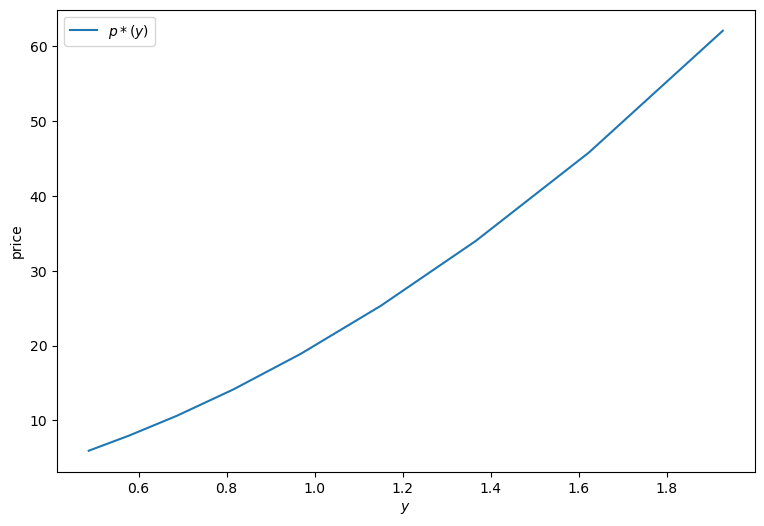

In [3]:
tree = LucasTree() # generate an instance
tree.solve_model()

fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(tree.ygrid, tree.price, label='$p*(y)$')
ax.set_xlabel('$y$')
ax.set_ylabel('price')
ax.legend()
plt.show()

Above shows the price fuction of an economy with the default parameters.
We find that the current price of an asset increases in its current dividend.

Based on the computed price function, we can construct a Markov chain of a simulated economy.

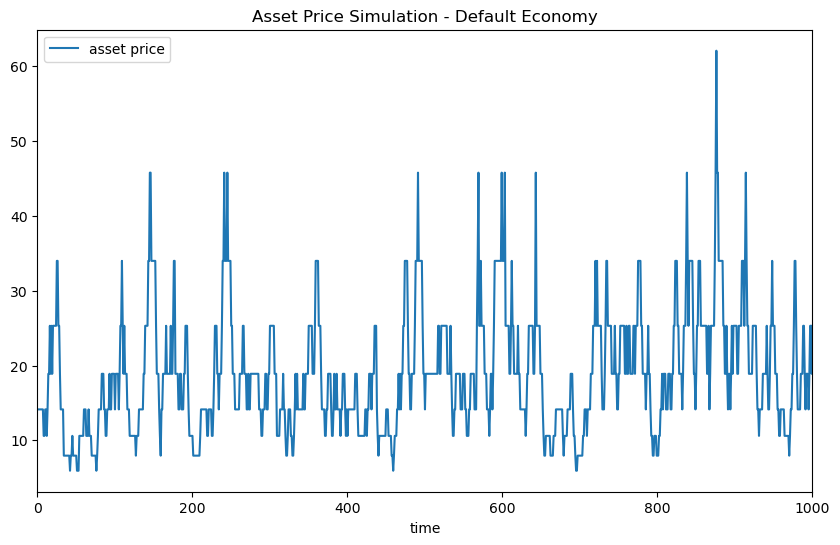

In [4]:
tree = LucasTree()
t, p_path, y_path = tree.simulate()

fig, ax = plt.subplots()
ax.plot(t, p_path, label = "asset price")
ax.set_xlabel("time")
ax.set_xlim(0, 1000)
ax.legend()
plt.title("Asset Price Simulation - Default Economy", loc="center")
plt.show()

**Comparative Statics 1: discount factor β**

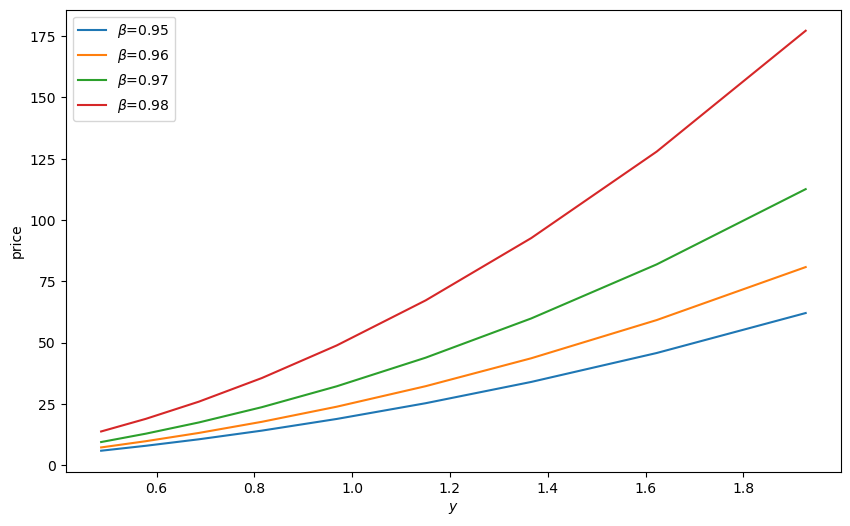

In [5]:
β_list = [0.95, 0.96, 0.97, 0.98]
fig, ax = plt.subplots()
for i, β in enumerate(β_list):
    tree = LucasTree(β = β)
    tree.solve_model()
    ax.plot(tree.ygrid, tree.price, label=f'$β$={β}')
ax.set_xlabel('$y$')
ax.set_ylabel('price')
ax.legend()
plt.show()

We find that as β increases, i.e. as the agent becomes more patient and forward-looking, the asset price increases. The intution behind this is that less myopic agents have a stronger desire to save.

**Comparative Statics 2: relative risk aversion γ and equity premium**

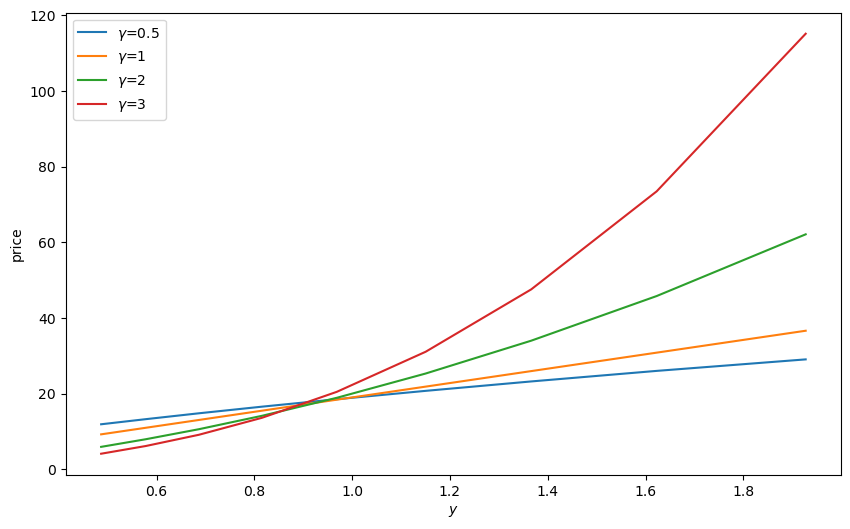

In [6]:
γ_list = [0.5, 1, 2, 3]
fig, ax = plt.subplots()
for i, γ in enumerate(γ_list):
    tree = LucasTree(γ = γ)
    tree.solve_model()
    ax.plot(tree.ygrid, tree.price, label=f'$γ$={γ}')
ax.set_xlabel('$y$')
ax.set_ylabel('price')
ax.legend()
plt.show()

Note that risk-averse agents become more sensitive to changes in dividends. We will come back to this issue in section 3.

## 3. Calibration: Matching Model to Data Moments

Note that our economy has a stationary asset price time series by construction, as opposed to real-world data. However, there still are some moments that would survive the detrending process and yet have significant economic meanings.

In this section, we focus on matching real-world **risk-free rate** and **equity premium** (in percentage point terms). The targets are
- risk-free rate = 2%
- equity premium = 6%p

The interpretation is that while risk-free assets (like US Treasury bonds) have an annual yield of 2%, investors demand 6%p extra returns to hold risky assets (like stocks).

To find these moments in our model, we first need to simulate the paths of $y_t$ and $p_t$. Then, the model’s **risk-free rate** and **equity premium** is computed as follows:

1. **Compute one‐period gross equity returns**  
$$ 
     R^e_{t+1}
     \;=\;
     \frac{p_{t+1} + y_{t+1}}{p_t}\,,
     \quad t = 0,1,\dots,T-1.
$$
   This is the total payoff (next period’s price plus dividend) divided by today’s price.

3. **Compute the stochastic discount factor (SDF)**  
   Under CRRA utility $u(c)=\frac{c^{1-\gamma}}{1-\gamma}$, the one‐period SDF is  
   $$
     m_{t+1}
     \;=\;
     \beta\,
     \Bigl(\frac{c_{t+1}}{c_t}\Bigr)^{-\gamma}
     \;=\;
     \beta\,
     \Bigl(\frac{y_{t+1}}{y_t}\Bigr)^{-\gamma},
   $$
   since in equilibrium $c_t = y_t$

4. **Estimate the risk‐free rate**  
   The gross risk‐free rate $R_f$ satisfies  
   $$
     1
     = \mathbb{E}[\,m_{t+1}\,R_f\,]
     \quad\Longrightarrow\quad
     R_f \;=\;\frac{1}{\mathbb{E}[\,m_{t+1}\,]}\,.
   $$

5. **Compute the equity premium**  
   Finally, the model equity premium (in levels) is  
   $$
     \mathbb{E}[R^e] \;-\; R_f
     = \frac{1}{T}\sum_{t=0}^{T-1}R^e_{t+1}
       \;-\;\frac{1}{\mathbb{E}[m]}\,.
   $$

The code below implements these steps.

In [7]:
def EquityPremium(tree, detail=False):

    t, p_path, y_path = tree.simulate(T=10_000)

    # Gross returns
    Re = (p_path[1:] + y_path[1:]) / p_path[:-1]

    # SDFs
    m  = tree.β * (y_path[1:] / y_path[:-1])**(-tree.γ)

    # Risk-free Rate
    Rf = 1.0 / np.mean(m)

    # Equity premium: E[R_e] - R_f
    eqp = np.mean(Re) - Rf
    eqp_percent = eqp/Rf*100

    if detail:
        print(f"Model risk‐free rate   = {Rf:.4f}")
        print(f"Model equity premium   = {eqp:.4f}")
        print(f"Model equity premium % = {(eqp_percent):.2f}%")

    return Rf, eqp, eqp_percent

A simple comparative statics graph shows that more risk-averse investors indeed demand higher equity premia.

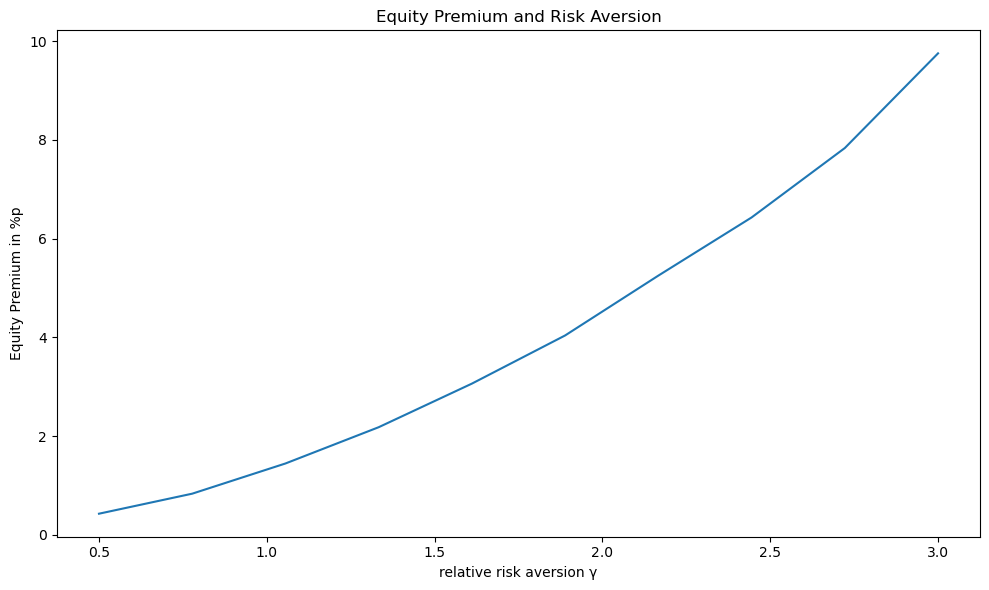

In [8]:
γ_list = np.linspace(0.5, 3, 10)
eqpp_list = np.empty_like(γ_list)
i = 0
for γ in γ_list:
    tree = LucasTree(γ=γ)
    _, _, eqpp_list[i] = EquityPremium(tree)
    i += 1

fig, ax = plt.subplots()
ax.plot(γ_list, eqpp_list)
ax.set_xlabel("relative risk aversion γ")
ax.set_ylabel("Equity Premium in %p")
plt.title("Equity Premium and Risk Aversion", loc="center")
plt.tight_layout()
plt.show()

Now we conduct a simple calibration excercise to meet our target risk-free rate and equity premium.

We start from the default parameters

In [9]:
from scipy.optimize import minimize_scalar

target_rf = 1.02
target_eqpp = 6.0
β, γ = 0.95, 2

tree_cal = LucasTree(β=β, γ=γ)
_, _, _ = EquityPremium(tree_cal, detail=True)

Model risk‐free rate   = 1.0257
Model equity premium   = 0.0453
Model equity premium % = 4.41%


Next, we target the equity premium - which is mostly affected by γ.

In [10]:
def eqpp_loss(γ):
    tree = LucasTree(β=β, γ=γ)
    _, _, eqpp = EquityPremium(tree)
    return (eqpp-target_eqpp)**2

res = minimize_scalar(eqpp_loss, bounds=(0.5, 5), method="bounded")
γ = res.x
print(f"Calibrated γ = {γ:.4f}")
tree_cal = LucasTree(β=β, γ=γ)
_, _, _ = EquityPremium(tree_cal, detail=True)

Calibrated γ = 2.3267
Model risk‐free rate   = 1.0167
Model equity premium   = 0.0586
Model equity premium % = 5.77%


Finally, we target the risk-free rate - which is mostly affected by β.

In [11]:
def rf_loss(β):
    tree = LucasTree(β=β, γ=γ)
    rf, _, _ = EquityPremium(tree)
    return (rf-target_rf)**2

res = minimize_scalar(rf_loss, bounds=(0.5, 1), method="bounded")
β = res.x
print(f"Calibrated β = {β:.4f}")
tree_cal = LucasTree(β=β, γ=γ)
_, _, _ = EquityPremium(tree_cal, detail=True)

Calibrated β = 0.9460
Model risk‐free rate   = 1.0203
Model equity premium   = 0.0609
Model equity premium % = 5.97%


The resulting calibrated economy can be depicted as follows.

Calibrated parameters: β = 0.946, γ = 2.327


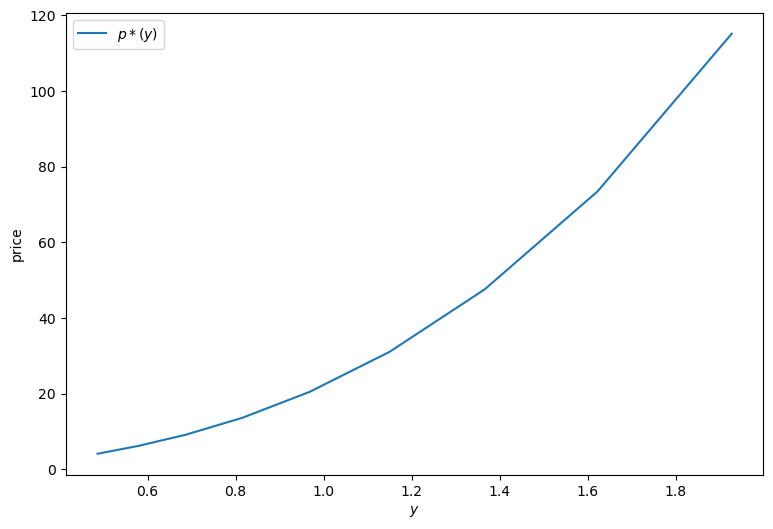

In [12]:
print(f"Calibrated parameters: β = {β:.3f}, γ = {γ:.3f}")

tree.solve_model()

fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(tree.ygrid, tree.price, label='$p*(y)$')
ax.set_xlabel('$y$')
ax.set_ylabel('price')
ax.legend()
plt.show()

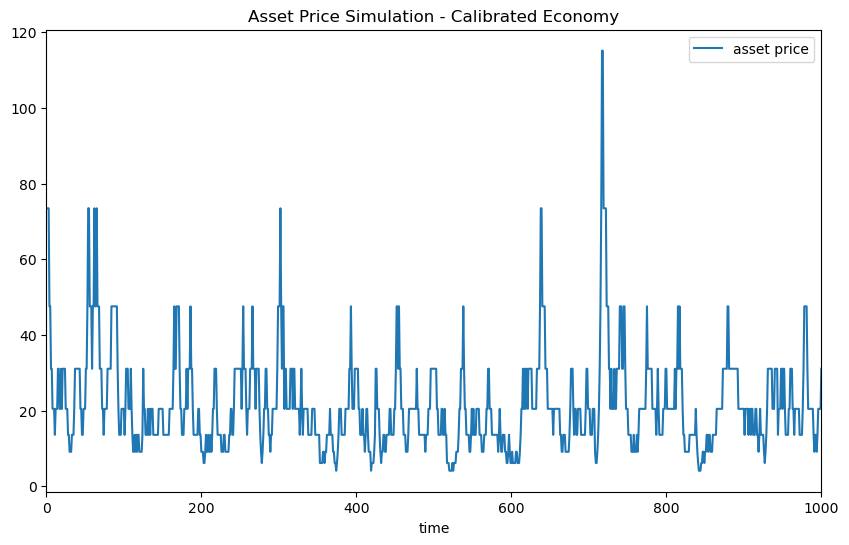

In [13]:
t, p_path, y_path = tree.simulate()

fig, ax = plt.subplots()
ax.plot(t, p_path, label = "asset price")
ax.set_xlabel("time")
ax.set_xlim(0, 1000)
ax.legend()
plt.title("Asset Price Simulation - Calibrated Economy", loc="center")
plt.show()

In general, prices are more volatile compared to the default economy.